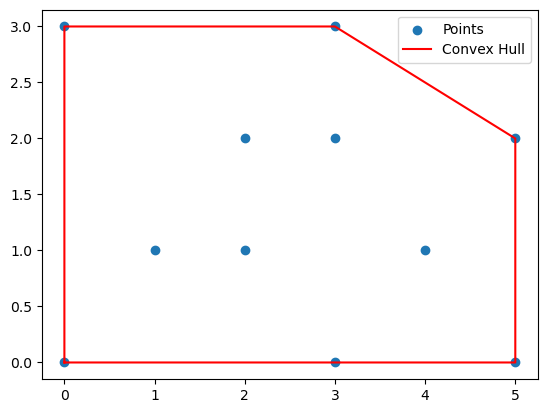

In [6]:
import math
import matplotlib.pyplot as plt

def cross_product(p1, p2, p3):
    """ Returns the cross product to determine turn direction """
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def distance(p1, p2):
    """ Euclidean distance between two points (for tie-breaking) """
    return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

def graham_scan(points):
    """ Computes the Convex Hull using Graham's Scan algorithm """
    if len(points) < 3:
        return points  # Convex hull is not possible with fewer than 3 points

    # Step 1: Find the bottom-most (or left-most) point
    min_point = min(points, key=lambda p: (p[1], p[0]))

    # Step 2: Sort points by polar angle with respect to min_point
    sorted_points = sorted(points, key=lambda p: (math.atan2(p[1] - min_point[1], p[0] - min_point[0]), distance(min_point, p)))

    # Step 3: Process sorted points using a stack
    hull = [sorted_points[0], sorted_points[1]]  # Start with first two points

    for p in sorted_points[2:]:
        while len(hull) > 1 and cross_product(hull[-2], hull[-1], p) <= 0:
            hull.pop()  # Remove last point if making a right turn
        hull.append(p)  # Add current point to the hull

    return hull

# Example Usage
points = [(0, 3), (2, 2), (1, 1), (2, 1), (3, 0),
          (0, 0), (3, 3), (3, 2), (4, 1), (5, 2), (5, 0)]
hull = graham_scan(points)

# Plotting
x, y = zip(*points)
hx, hy = zip(*hull + [hull[0]])  # Close the hull

plt.scatter(x, y, label="Points")
plt.plot(hx, hy, 'r-', label="Convex Hull")
plt.legend()
plt.show()


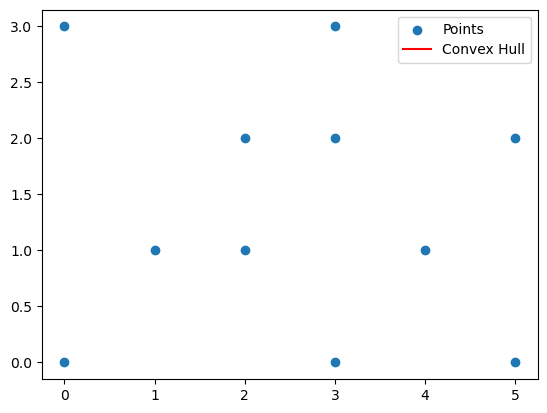

In [7]:
import matplotlib.pyplot as plt

def find_side(p1, p2, p):
    """ Returns the side of point p relative to the line (p1, p2) """
    return (p[0] - p1[0]) * (p2[1] - p1[1]) - (p[1] - p1[1]) * (p2[0] - p1[0])

def distance(p1, p2, p):
    """ Returns the perpendicular distance of point p from line (p1, p2) """
    return abs(find_side(p1, p2, p))

def quickhull_util(points, p1, p2, side, hull):
    """ Recursively finds points for the convex hull """
    farthest_point = None
    max_dist = 0

    for p in points:
        if find_side(p1, p2, p) == side:
            d = distance(p1, p2, p)
            if d > max_dist:
                max_dist = d
                farthest_point = p

    if farthest_point is None:
        hull.append(p1)
        return

    quickhull_util(points, farthest_point, p1, -find_side(farthest_point, p1, p2), hull)
    quickhull_util(points, farthest_point, p2, -find_side(farthest_point, p2, p1), hull)

def quickhull(points):
    """ Computes the convex hull using QuickHull algorithm """
    if len(points) < 3:
        return points  # Convex hull is not possible

    leftmost = min(points, key=lambda p: p[0])
    rightmost = max(points, key=lambda p: p[0])

    hull = []
    quickhull_util(points, leftmost, rightmost, 1, hull)
    quickhull_util(points, leftmost, rightmost, -1, hull)

    return list(set(hull))  # Remove duplicates

# Example Usage
points = [(0, 3), (2, 2), (1, 1), (2, 1), (3, 0),
          (0, 0), (3, 3), (3, 2), (4, 1), (5, 2), (5, 0)]

hull = quickhull(points)

# Plotting
x, y = zip(*points)
hx, hy = zip(*hull + [hull[0]])  # Close the hull

plt.scatter(x, y, label="Points")
plt.plot(hx, hy, 'r-', label="Convex Hull")
plt.legend()
plt.show()


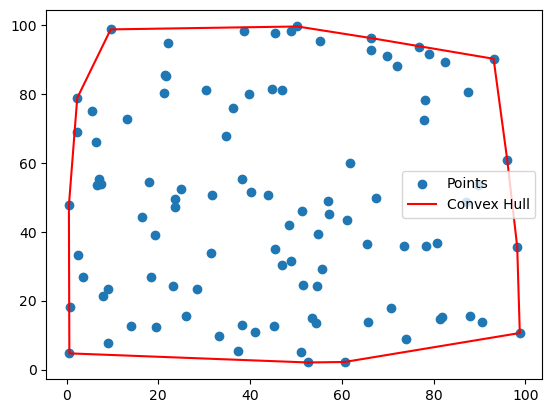

In [40]:
import random
def  crossroduct(p1,p2,p3):
    return (p2[0]-p1[0])*(p3[1]-p1[1]) - (p2[1]-p1[1])*(p3[0]-p1[0]) 

def distance_euc(p1,p2):
    return ((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)**(.5)

def graham_scan_(points):
    if len(points) < 3:
        return points

    min_points = min(points, key= lambda p : (p[1],p[0]))

    sorted_points = sorted(points , key = lambda p : (math.atan2(p[1]- min_points[1],p[0] - min_points[0] ), distance_euc(p , min_points)))

    hull = [sorted_points[0], sorted_points[1]]

    for p in sorted_points[2:]:
        while len(hull ) >1 and crossroduct(hull[-2], hull[-1] , p) <=0:
            hull.pop()
            
        hull.append(p)

    return hull
points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(100)]

hull = graham_scan_(points)
x, y = zip(*points)
hx, hy = zip(*hull + [hull[0]])  # Close the hull

plt.scatter(x, y, label="Points")
plt.plot(hx, hy, 'r-', label="Convex Hull")
plt.legend()
plt.show()


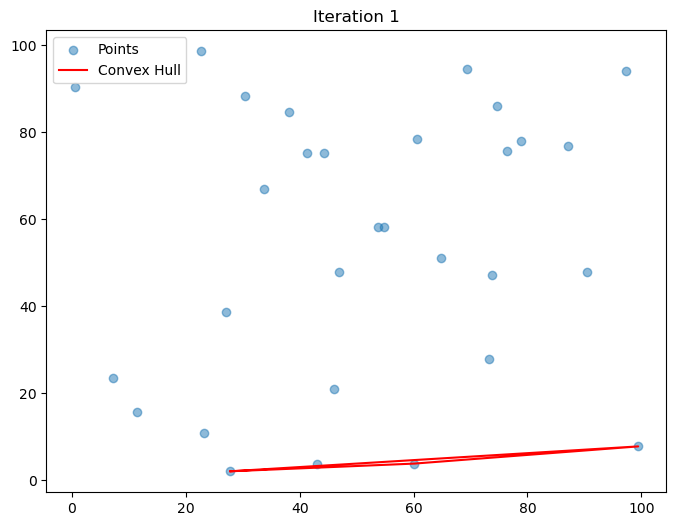

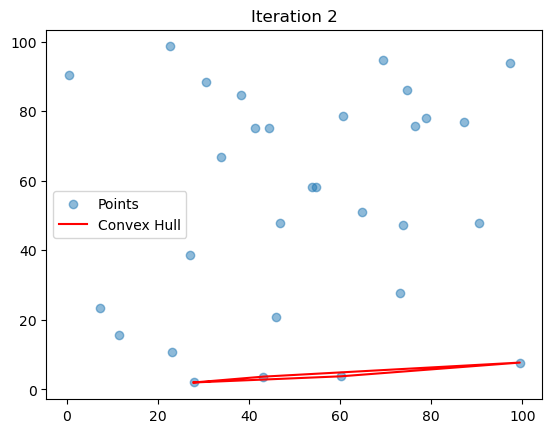

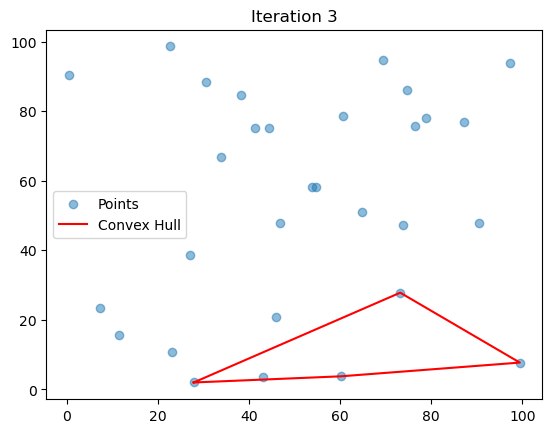

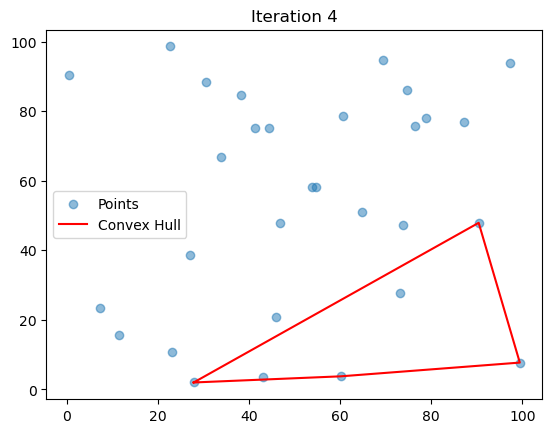

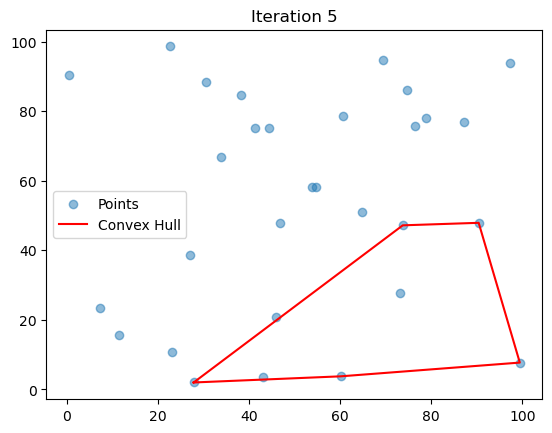

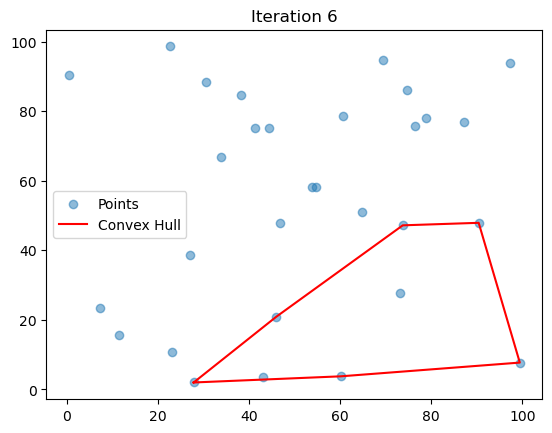

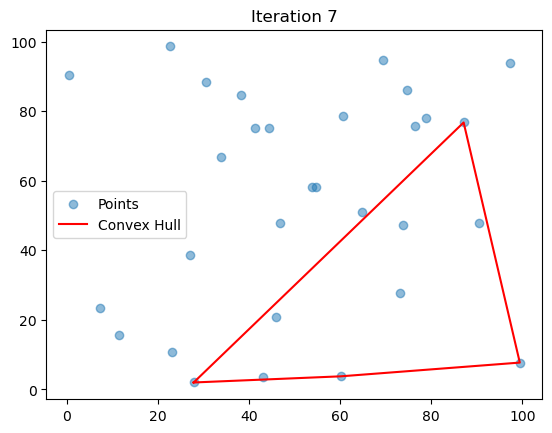

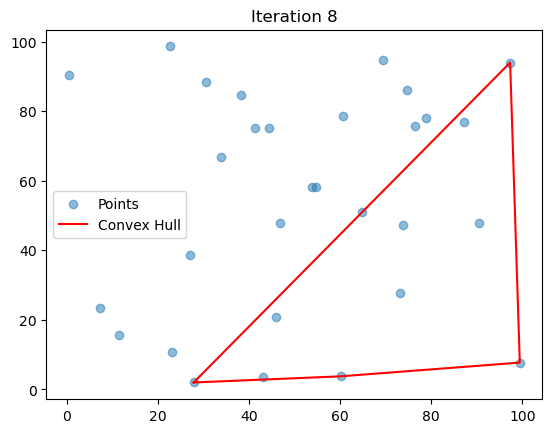

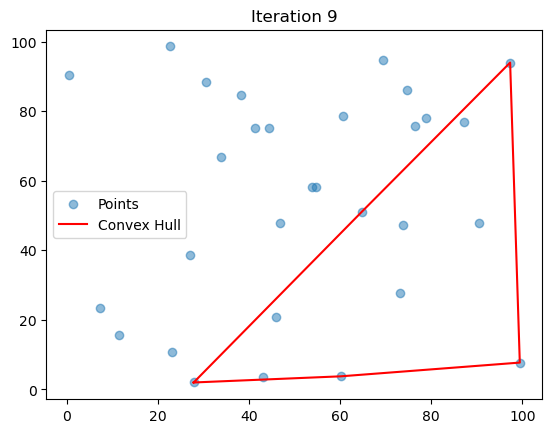

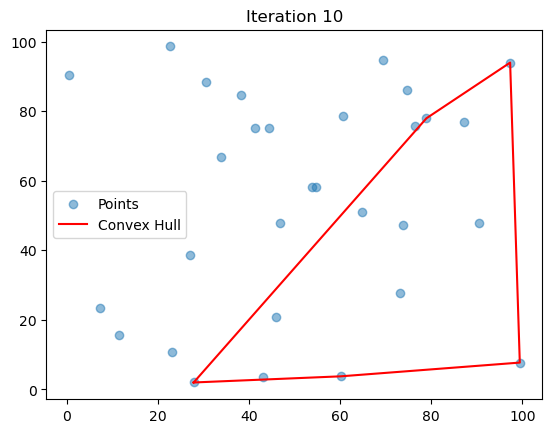

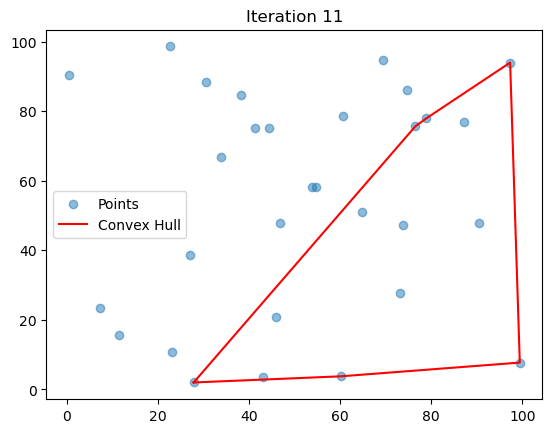

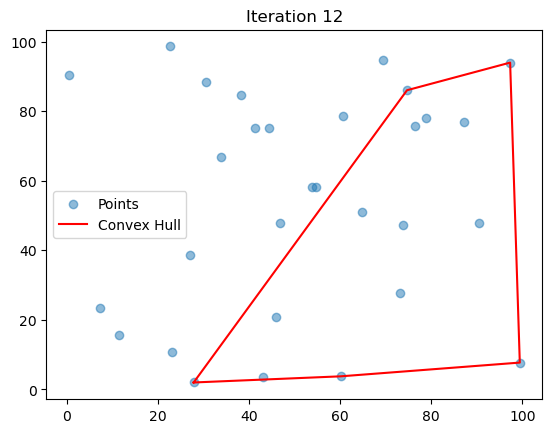

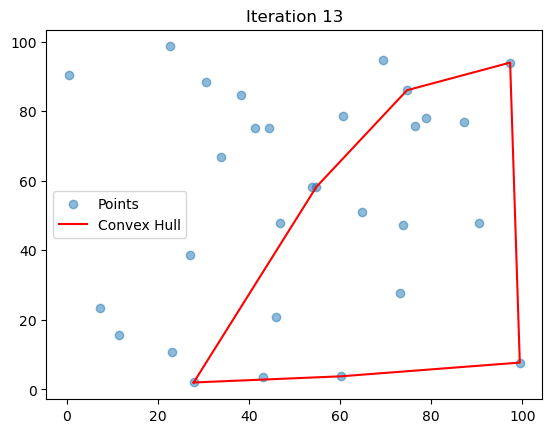

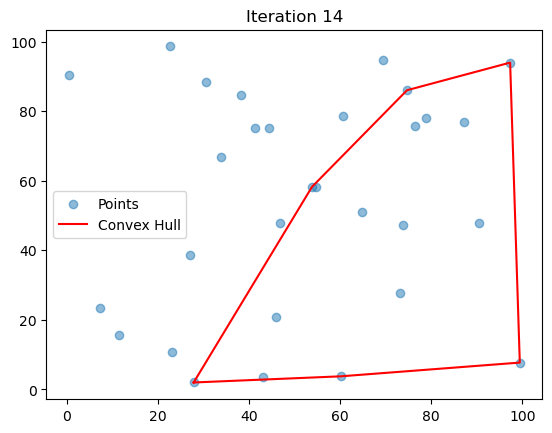

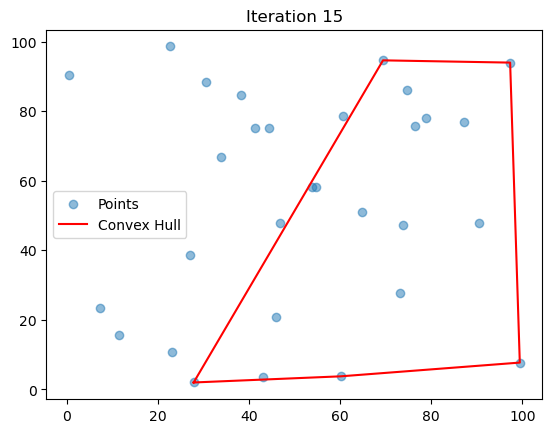

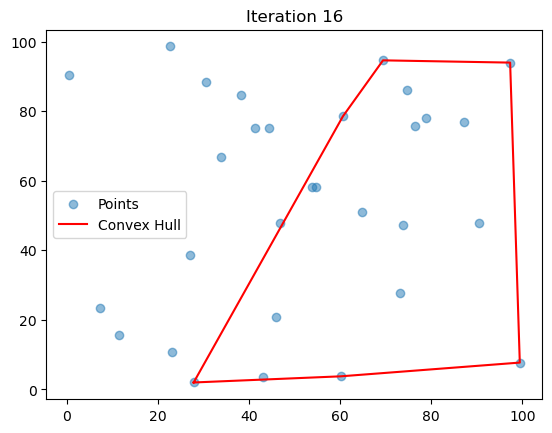

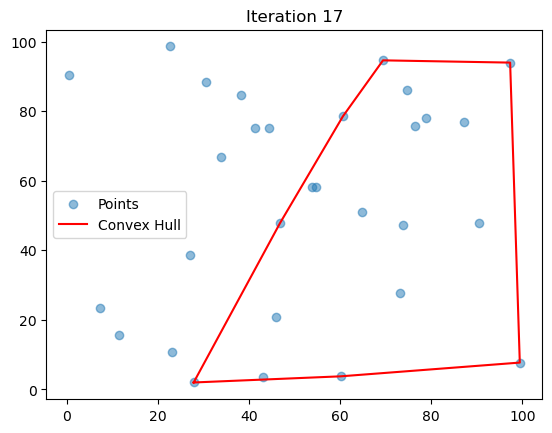

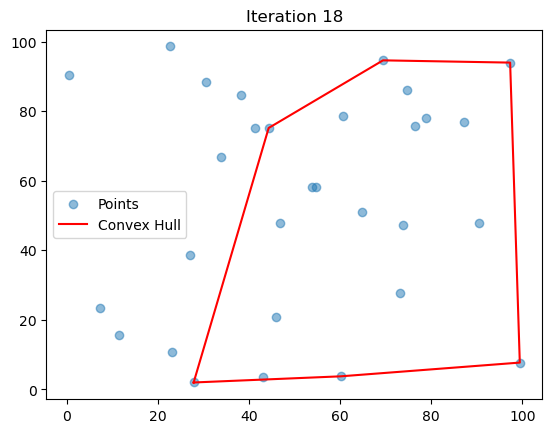

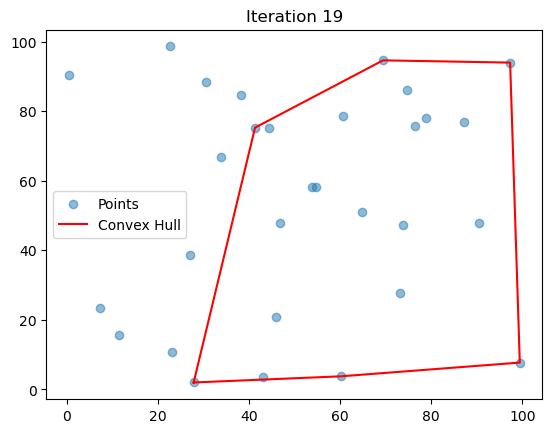

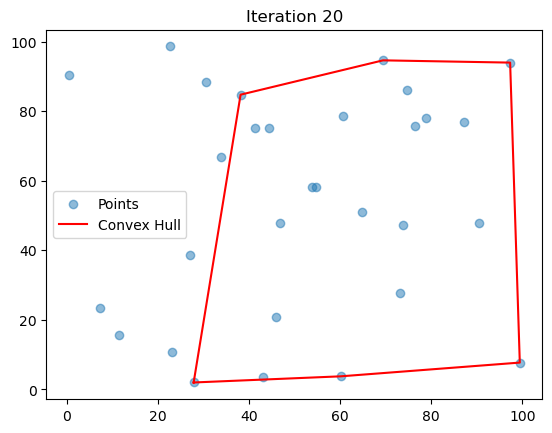

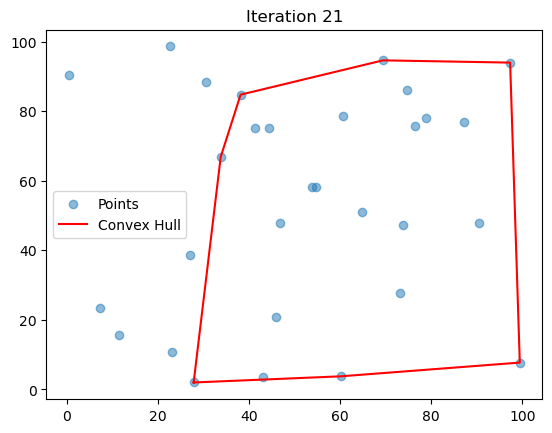

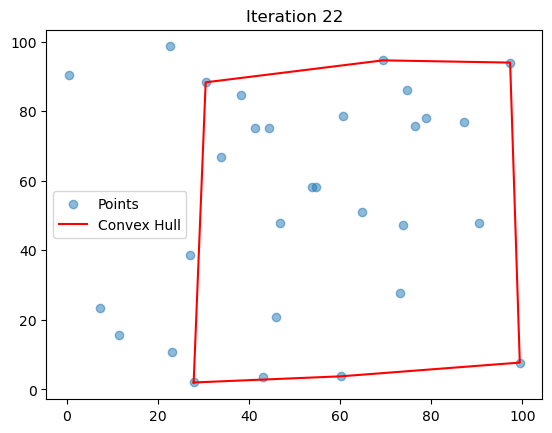

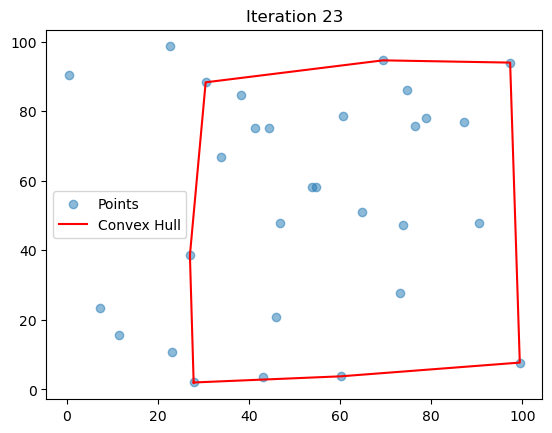

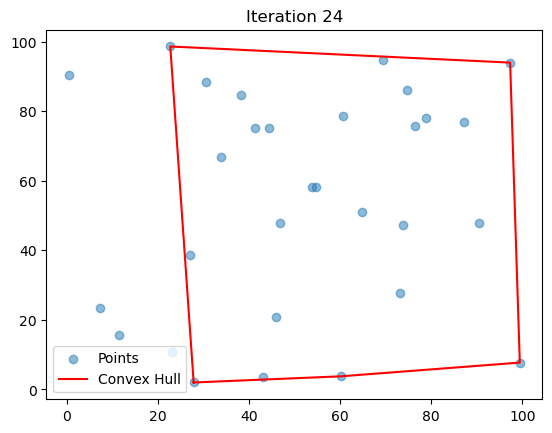

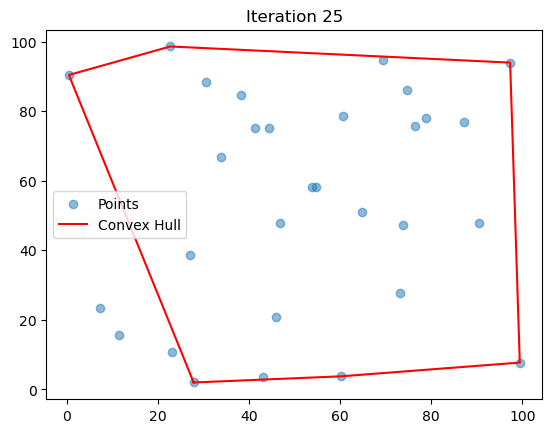

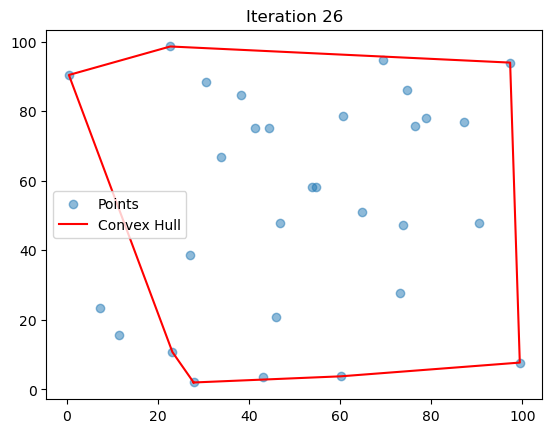

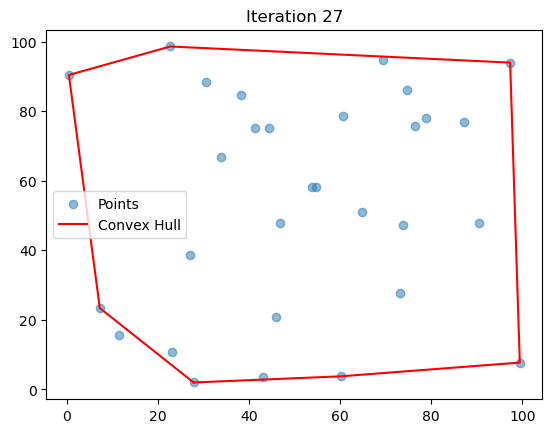

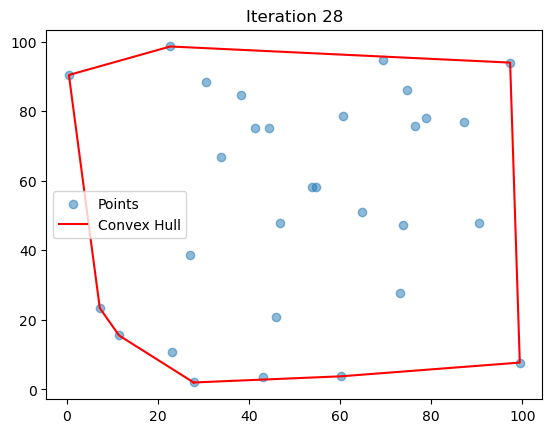

In [41]:

import math
import matplotlib.pyplot as plt

def cross_product(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def distance_euc(p1, p2):
    return ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5

def graham_scan_with_plot(points):
    if len(points) < 3:
        return points

    min_point = min(points, key=lambda p: (p[1], p[0]))
    sorted_points = sorted(points, key=lambda p: (math.atan2(p[1] - min_point[1], p[0] - min_point[0]), distance_euc(p, min_point)))

    hull = [sorted_points[0], sorted_points[1]]
    plt.figure(figsize=(8, 6))

    for i, p in enumerate(sorted_points[2:], start=1):
        while len(hull) > 1 and cross_product(hull[-2], hull[-1], p) <= 0:
            hull.pop()

        hull.append(p)

        # Plot the current hull at each iteration
        plt.clf()
        x, y = zip(*points)
        plt.scatter(x, y, label="Points", alpha=0.5)
        
        if len(hull) > 1:
            hx, hy = zip(*hull + [hull[0]])
            plt.plot(hx, hy, 'r-', label="Convex Hull")

        plt.legend()
        plt.title(f"Iteration {i}")
        plt.pause(0.3)

    plt.show()
    return hull

# Generate random points
points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(30)]

# Run Graham's scan with visualization
hull = graham_scan_with_plot(points)
